# Exploring Causal Quantum Dynamics

I'm going to be exploring some simple examples within the bohmian mechanics ([de broglie-bohm pilot-wave](https://en.wikipedia.org/wiki/De_Broglie%E2%80%93Bohm_theory)) interpretation of quantum mechanics (QM). This is a fully deterministic, empirically equivalent, version of QM that eliminates all of the 'wierd stuff' that is usually encountered. At the end will be some useful literature to learn more about the current state of the field (which looks *very* exciting). 

## The basics

There is still a wavefunction $\Psi$ described by the Schrodinger equation for a single particle located at $\mathbf{r}=<r_x,r_y,r_z>$: 

$$ i\hbar\frac{\partial}{\partial t} \Psi(\mathbf{r},t) = \left [ \frac{-\hbar^2}{2m}\nabla^2 + V(\mathbf{r},t)\right ] \Psi(\mathbf{r},t) $$

However, contrary to normal QM, if instead of some abstract entity we assume that the wavefunction is an object that acts on particles like a wave pushing around a beach-ball (i.e. a *pilot-wave*) then suddenly it has physical meaning. To that end, lets assume that the wave function has some polar form: 

$$ \Psi(\mathbf{r},t) = R(\mathbf{r},t)e^{iS(\mathbf{r},t)/\hbar} $$

Where $R(\mathbf{r},t)$ and $S(\mathbf{r},t)$ are both real valued functions. Then we can do some re-arranging to arrive at what are known as the [quantum Hamilton-Jacobi and the continuity equations](https://en.wikipedia.org/wiki/Quantum_potential#Quantum_potential_as_part_of_the_Schr%C3%B6dinger_equation).

### Quantum Hamilton-Jacobi

$$ -\frac {\partial S}{\partial t}={\frac {\left(\nabla S\right)^{2}}{2m}}+V+Q $$

Above is the quantum Hamilton-Jacobi equation where V is the classical potential and Q is the *non-local* quantum potential defined as:

$$  Q=-\frac{\hbar^{2}}{2m}\frac{\nabla ^{2}R}{R} $$

### Quantum Continuity Equation
The continuity equation is therefore defined as:

$$ \frac {\partial R^2}{\partial t}+\nabla \left(R^2\nabla \frac{S}{m}\right) = 0 $$

This is named the continuity equation because of it's similarity to the continuity equation in fluid dynamics. I won't go into depth with it except to use the analogy to extract the equation of motions ( However this analogy has lead to an extremely rich literature [cite] ). I'd like to note that the equations of motion can also be extracted solely from the quantum Hamilton-Jacobi equation by interpreting S to be the quantum [action](https://en.wikipedia.org/wiki/Action_(physics).

If you consider $\rho = R^2 = \left| \psi \right|^2$ then we can rewrite the continuity equation in terms of a probability density ( $\left|\psi(x,t)\right|^2$ is the quantum probability density of finding some particle at a location and time) : 

$$ \frac {\partial \rho}{\partial t}+\nabla \left(\rho v\right) = 0$$

$$ where \quad v = \nabla \frac{S}{m} $$

Above is the velocity field that emerges from this interpretation. From this we can define normal time evolution of some particle $a$'s position:

$$ \frac {d\mathbf{r}_{a}}{dt} = \left.\nabla \frac{S}{m}\right|_{\mathbf{r}_{a}} $$

These equations are difficult to solve usually. But there are a couple of simple QM problems that we can attempt that don't require more advanced numerical recipes.

## The quantum harmonic oscillator in a quadratic potential

Let's now look at a simple example in 1D. We will first look at the analytical results, and then write some code to visualize the system.

The hamiltonian of the system looks like: 

$$ {\hat {H}}={\frac {{\hat {p}}^{2}}{2m}}+{\frac {1}{2}}m\omega^2{\hat {x}}^{2} $$

And can be plugged in to the time-independent schrodinger equation (TISE):

$$ \hat {H} \vert \Psi \rangle =E\vert \Psi \rangle $$

This is an analytically solvable eigenvalue problem where the solution is given by:

$$ \psi _{n}(x)={\frac {1}{\sqrt {2^{n}\,n!}}}\cdot \left({\frac {m\omega }{\pi \hbar }}\right)^{1/4}\cdot e^{-{\frac {m\omega x^{2}}{2\hbar }}}\cdot H_{n}\left({\sqrt {\frac {m\omega }{\hbar }}}x\right),\qquad n=0,1,2,\ldots . $$

and $H_n$ are so-called physicist's Hermite polynomials:

$$  H_{n}(z)=(-1)^{n}~e^{z^{2}}{\frac {d^{n}}{dz^{n}}}\left(e^{-z^{2}}\right) $$

and 

$$\omega = \sqrt{\frac{k}{m}}$$

Here we are going to use QuntumOptics.jl to compare the results of the typical QM to Bohmian Mechanics

In [1]:
using QuantumOptics, Plots, Calculus ;
pyplot() ; 

In [6]:
# System Parameters
m = 1.
ω = 3 # Strength of trapping potential
# Position Basis
xmin = -5
xmax = 5
Npoints = 100
b_position = PositionBasis(xmin, xmax, Npoints)


x = position(b_position)
p = momentum(b_position)
H = p^2/(2*m) + .5*m*(ω^2)*full(x^2)
energies, states = eigenstates((H+dagger(H))/2, 10);


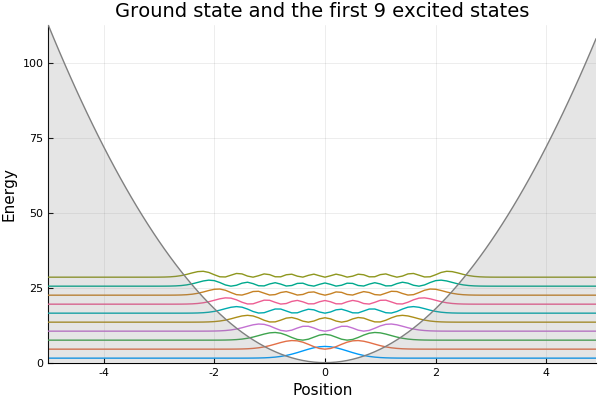

In [7]:
x_points = xpoints = particle.samplepoints(b_position)
plot(legend=false)
for i in 1:length(states)
    plot!(x_points, abs2(states[i].data)*40 + energies[i])
end
plot!(x_points, .5*m*ω^2*x_points.^2, fill=0, fillalpha=.2,color=:grey)
xlabel!("Position")
ylabel!("Energy")
title!("Ground state and the first 9 excited states")


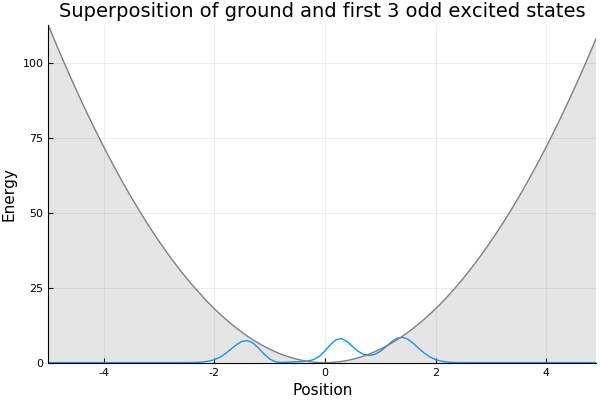

In [8]:
sup = states[1]+states[2]+states[4]+states[6];
plot(legend=false)
plot!(xpoints,abs2(sup.data)*40)
plot!(xpoints, .5*m*(ω^2)*xpoints.^2, fill=0, fillalpha=.2,color=:grey)
xlabel!("Position")
ylabel!("Energy")
title!("Superposition of ground and first 3 odd excited states")

Now, lets jump back to Bohmian mechanics. In the Bohm picture the time-independent solution (i.e. at steady-state) is the statistical average of *infinitely many* single particle trajectories. 

## The *time-dependent* quantum harmonic oscillator 

Let's lay out the equations for a time dependent one partical system in 1D with a parabolic potential:

$$ -\frac {\partial S}{\partial t}={\frac{1}{2m} \left(\frac{\partial S}{\partial x}\right)^{2}}+\frac{1}{2}m\omega^2x^2-\frac{\hbar^{2}}{2m}\frac{1}{R}\frac{\partial ^{2}R}{\partial x^2} $$

$$ v = \frac{1}{m} \frac{\partial S}{\partial x} $$

$$ \frac {\partial R^2}{\partial t}+\frac{\partial}{\partial x}\left(R^2 v\right) = 0 $$

$$ \frac {d\mathbf{r}_{a}}{dt} = \left.v\right|_{\mathbf{r}_{a}} $$

In [39]:
x = position(b_position)
p = momentum(b_position)
H = p^2/(2*m) + .5*m*(ω^2)*full(x^2)

# Initial state
x0 = 1.5
p0 = 0
sigma0 = 0.6
#Ψ0 = gaussianstate(b_position, x0, p0, sigma0);
Ψ0 = sup
t0=0
dt=0.05
t=3
# Time evolution
T = [t0:dt:t;]
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H);

# Plot dynamics of particle density
x_points = particle.samplepoints(b_position)

n = abs(Ψ0.data).^2
V = .5*m*(ω^2)*x_points.^2
C = maximum(V)/maximum(n)

532.4679091696706

In [255]:
@gif for i=1:length(T)
    plot(size=(600,300),legend=false,ylim=(0,.625))
    plot!(x_points, (V-3)/C, color=:grey,fillalpha=.5,fill=-0.025)
    n = abs2(Ψt[i].data)
    xlabel!("x")
    ylabel!("| \$\\Psi(t)\$ |^2")
    plot!(x_points, n, color="blue")
end

INFO: Saved animation to /home/paul/Documents/Personal/pkairys.github.io/_posts/2018-02-16-Exploring-Causal-Quantum-Dynamics/tmp.gif


Plots.AnimatedGif("/home/paul/Documents/Personal/pkairys.github.io/_posts/2018-02-16-Exploring-Causal-Quantum-Dynamics/tmp.gif")

In [40]:
unpack=[abs2(Ψt[i].data) for i in 1:length(Ψt)];
qhm_dens = hcat(unpack...);


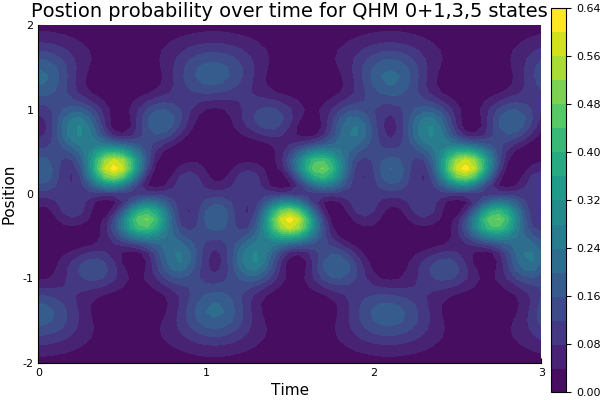

In [41]:
contourf(T,xpoints,qhm_dens,color=:viridis,ylims=(-2,2))
title!("Postion probability over time for QHM 0+1,3,5 states")
xlabel!("Time")
ylabel!("Position")

In [3]:
using DiffEqOperators

In [81]:
A = DerivativeOperator{Float64}(1,2,.1,100,:Dirichlet0,:Dirichlet0)

LoadError: [91mTypeError: DerivativeOperator: in T, expected T<:Real, got Type{Complex{Float64}}[39m

In [80]:
function deriv_complex::Complex{fl{()

Complex{Int64}

In [79]:
methods(DerivativeOperator{)

# 1 method for generic function "(::Type)":
(::Type{T})(arg) where T in Base at sysimg.jl:77

In [74]:
function trajectory(xi::Int,wf::Array,diff_op::DiffEqOperators.DerivativeOperator)
    wfs = [_wf.data for _wf in wf]
    conj_wfs = [conj(_wf.data) for _wf in wf]
    xs = zeros(Float64,length(wf))
    xs[1] = xpoints[xi]
    for i in 2:length(wfs)
        realddx = A*real(wfs[i])
        imagddx = A*imag(wfs[i])
        ddx = (1/2im)*((conj(wfs[i])*realddx - ))
        xs[i] = ddx[xi]*dt+xs[i-1]
    end
    return xs
end

trajectory (generic function with 2 methods)

In [75]:
traj = trajectory(50,Ψt,A);


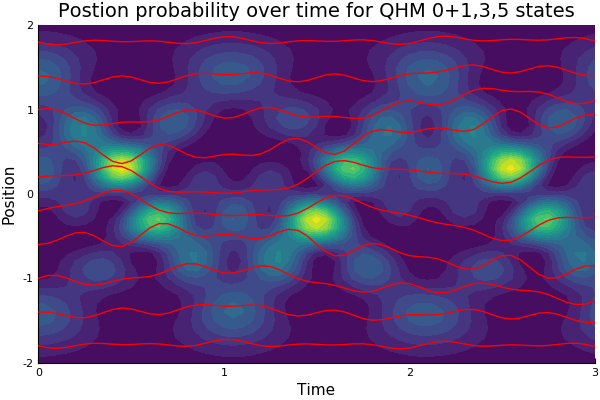

In [76]:
plot(legend=false)
contourf!(T,xpoints,qhm_dens,color=:viridis,ylims=(-2,2))
for i in 1:4:100
    plot!(T,trajectory(i,Ψt,A),color=:red)
end
title!("Postion probability over time for QHM 0+1,3,5 states")
xlabel!("Time")
ylabel!("Position")